In [14]:

#exploration des données
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv('../data/processed/clean_data.csv')


# Convertir la colonne 'UTC' en format datetime
df['UTC'] = pd.to_datetime(df['UTC'])


# Statistiques descriptives
print(df.describe())

# Histogramme de la température
plt.hist(df['Temperature[C]'], bins=20)
plt.xlabel('Température (°C)')
plt.ylabel('Fréquence')
plt.title('Distribution de la température')
plt.show()

# Matrice de corrélation
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


from autoviz.AutoViz_Class  import AutoViz_Class



AV = AutoViz_Class()
AV.AutoViz(filename='', dfte=df, depVar='Fire Alarm', verbose=1, max_rows_analyzed=df.shape[0], max_cols_analyzed=df.shape[1])



#print(df.head())
#print(df.info())
#print(df.describe())








                   UTC                Temperature[C]  Humidity[%]  \
count                           4481    4481.000000   4481.000000   
mean   2022-06-10 02:45:52.374916352      18.742025     47.074124   
min              2022-06-08 18:16:29      -7.799000     12.940000   
25%              2022-06-09 00:23:02      13.930000     44.070000   
50%              2022-06-09 08:05:25      20.460000     48.240000   
75%              2022-06-09 13:54:21      26.220000     52.340000   
max              2022-06-13 14:20:49      46.850000     74.890000   
std                              NaN      10.413657      8.439484   

         TVOC[ppb]     eCO2[ppm]      Raw H2      Raw Ethanol  Pressure[hPa]  \
count   4481.000000   4481.000000   4481.000000   4481.000000   4481.000000    
mean    1307.860076    499.562151  12953.547869  20099.361080    938.397030    
min        0.000000    400.000000  11152.000000  16361.000000    930.872000    
25%       30.000000    400.000000  12785.000000  19680.000

Total Number of Scatter Plots = 36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43463 entries, 0 to 43462
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43463 non-null  int64  
 1   UTC             43463 non-null  int64  
 2   Temperature[C]  43463 non-null  float64
 3   Humidity[%]     43463 non-null  float64
 4   TVOC[ppb]       43463 non-null  int64  
 5   eCO2[ppm]       43463 non-null  int64  
 6   Raw H2          43463 non-null  int64  
 7   Raw Ethanol     43463 non-null  int64  
 8   Pressure[hPa]   43463 non-null  float64
 9   PM1.0           43463 non-null  float64
 10  PM2.5           43463 non-null  float64
 11  NC0.5           43463 non-null  float64
 12  NC1.0           43463 non-null  float64
 13  NC2.5           43463 non-null  float64
 14  CNT             43463 non-null  int64  
 15  Fire Alarm      43463 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 5.3 MB
None
         Unnamed: 0       

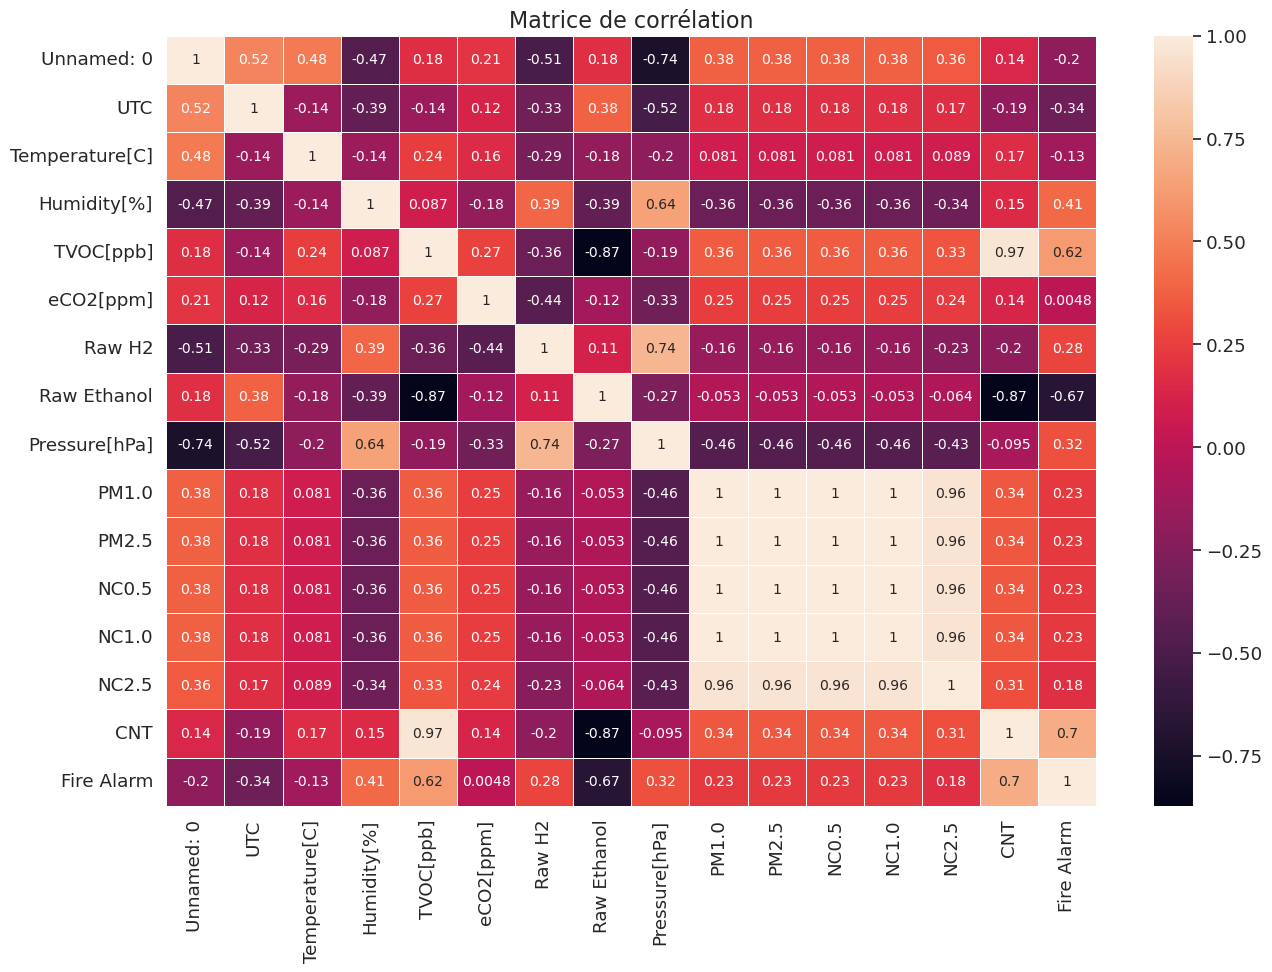

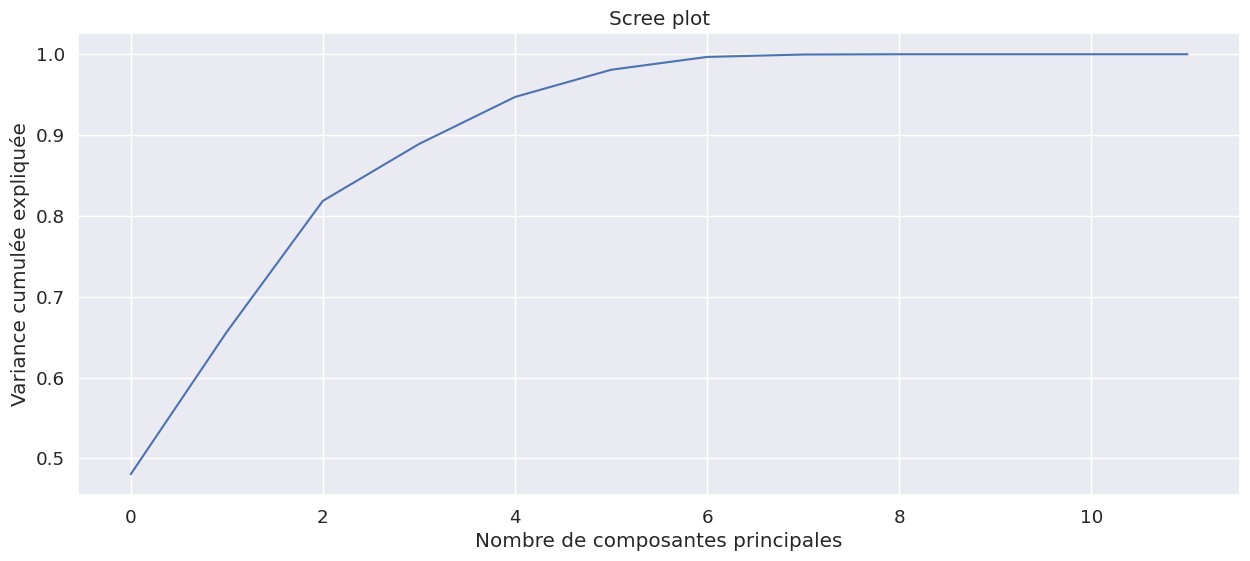

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA





data = pd.read_csv("../data/processed/clean_dataset_.csv")

print(data.info())
print(data.describe())

corr = data.corr()
numerical_cols = ['Temperature[C]','Humidity[%]','TVOC[ppb]','eCO2[ppm]','Raw H2','Raw Ethanol','Pressure[hPa]','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5']
plt.figure(figsize=(15, 10))
sns.set_theme(font_scale=1.2)
sns.heatmap(corr, annot=True, annot_kws={"size": 10}, linewidths=0.5)
plt.title("Matrice de corrélation", fontsize=16)  # Augmente la taille du titre
plt.show()


# Standardisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_cols])

# ACP - Calcul de toutes les composantes
pca = PCA()
principalComponents = pca.fit_transform(data_scaled)

# Variance expliquée
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(15, 6))
plt.plot(np.cumsum(explained_variance))

plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance cumulée expliquée')
plt.title('Scree plot')
plt.show()



Pourcentage de variance expliquée par chaque composante principale :
Composante 1 : 0.3968
Composante 2 : 0.2372
Composante 3 : 0.1409
Composante 4 : 0.0645


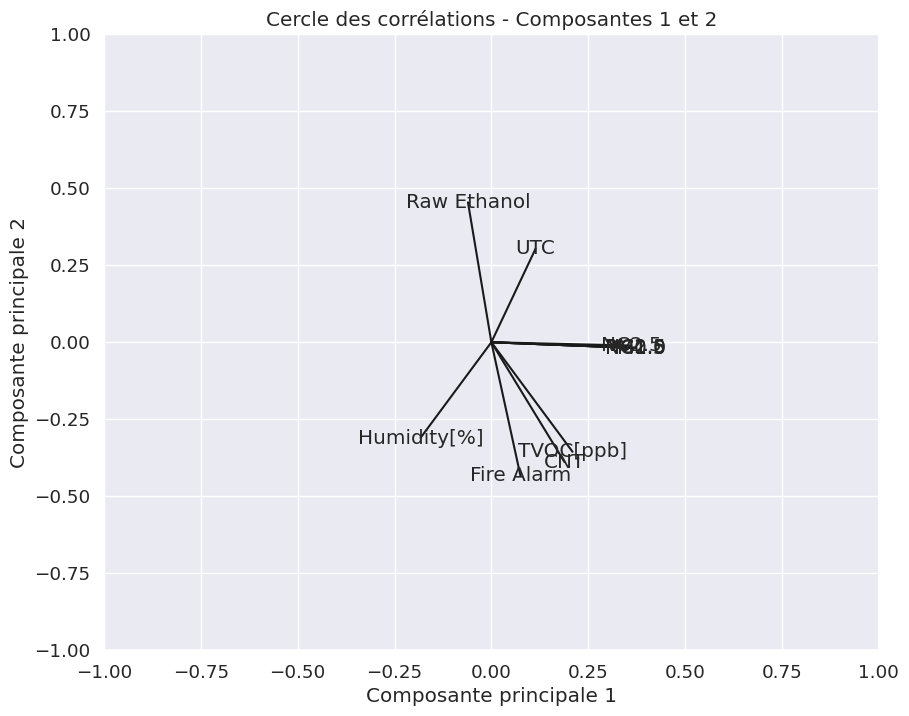

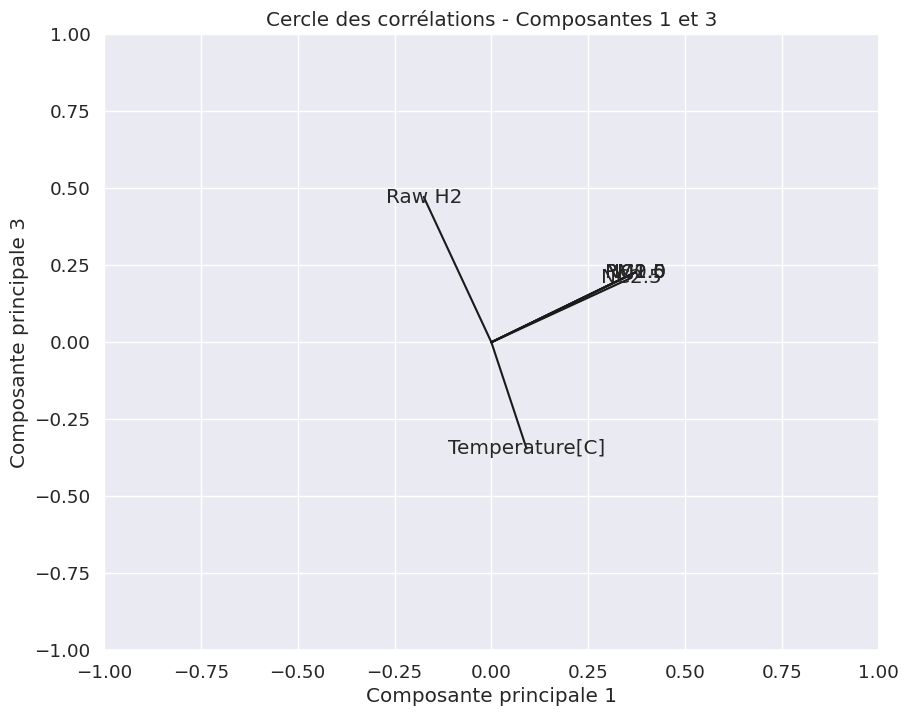

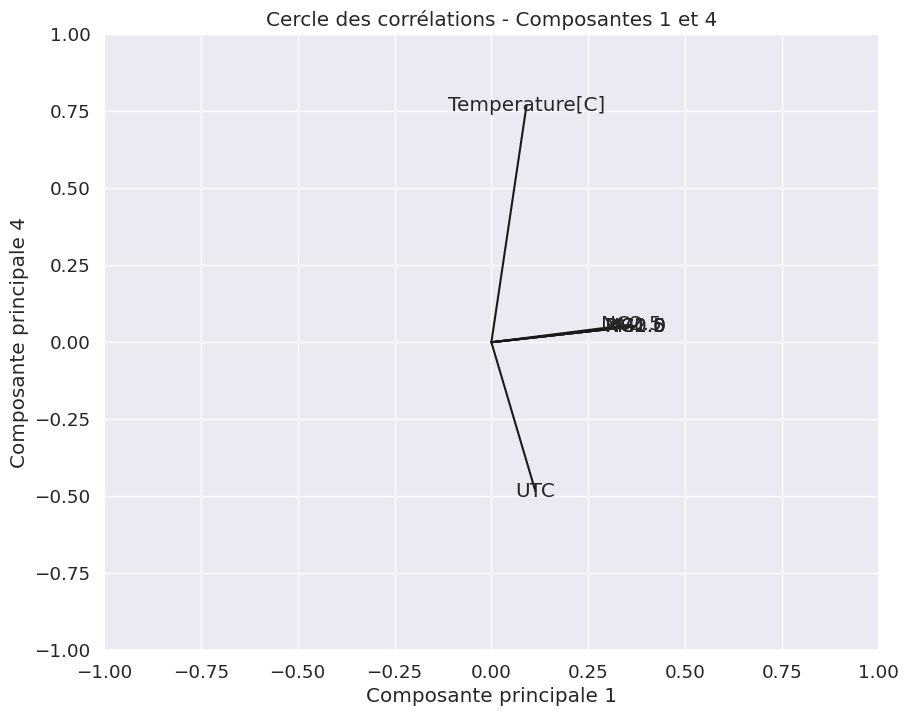

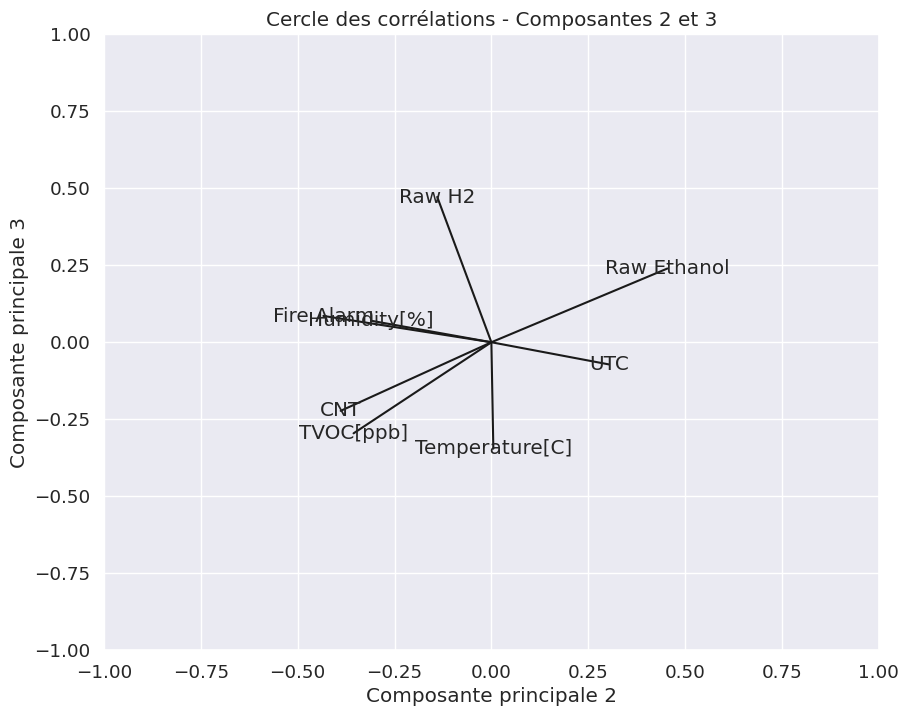

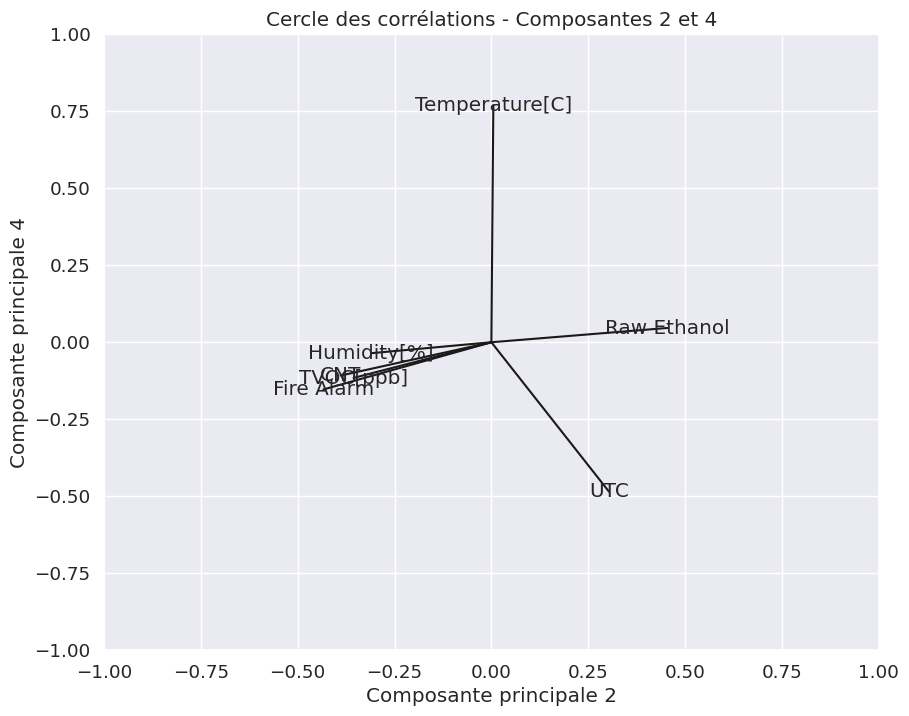

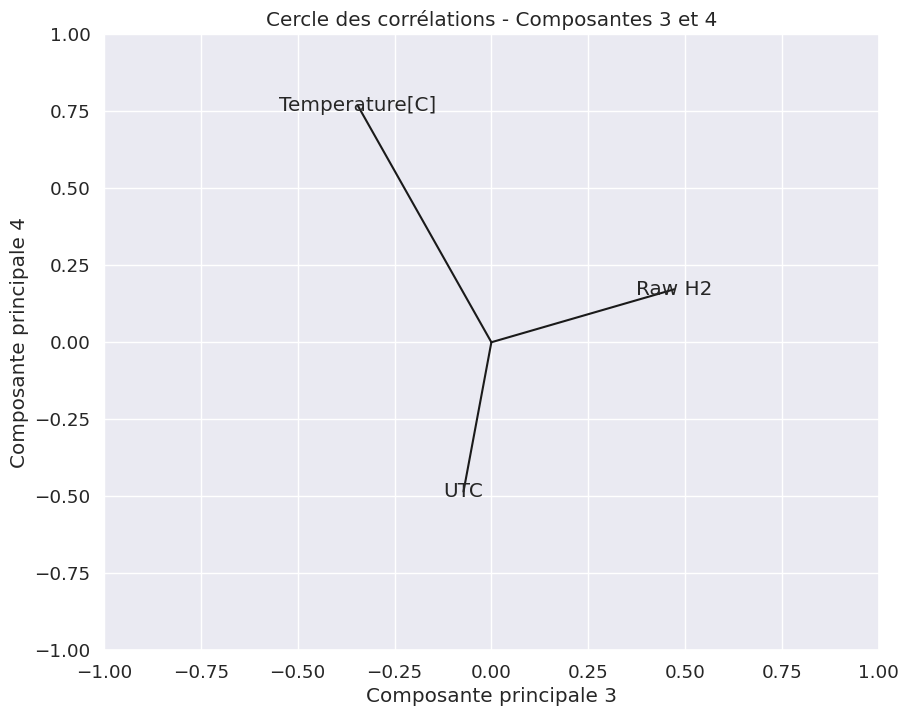

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Chargement des données
data = pd.read_csv("../data/processed/clean_dataset_.csv")

# Standardisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# ACP - Choix du nombre de composantes
n_components = 4  # Vous pouvez modifier cette valeur

pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(data_scaled)

# Variance expliquée
variance_ratio = pca.explained_variance_ratio_

# Analyse de la variance expliquée
print("Pourcentage de variance expliquée par chaque composante principale :")
for i, ratio in enumerate(variance_ratio):
    print(f"Composante {i+1} : {ratio:.4f}")

# Seuil de corrélation (ajustez selon vos besoins)
correlation_threshold = 0.3

for i in range(n_components):
    for j in range(i+1, n_components):
        plt.figure(figsize=(10, 8))
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        plt.xlabel(f'Composante principale {i+1}')
        plt.ylabel(f'Composante principale {j+1}')

        # Filtrer les variables en fonction du seuil de corrélation
        for k, (x, y) in enumerate(zip(pca.components_[i], pca.components_[j])):
            if np.abs(x) > correlation_threshold or np.abs(y) > correlation_threshold:
                plt.plot([0, x], [0, y], color='k')
                plt.text(x, y, data.columns[k], ha='center', va='center')

        plt.title(f"Cercle des corrélations - Composantes {i+1} et {j+1}")
        plt.show()